In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

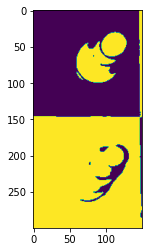

In [9]:
img = cv2.imread("data/CNN/train/Bishop/6.jpg",0)
blur = cv2.GaussianBlur(img,(5,5),0)
_, img_binary = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img_binary)

In [4]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [46]:
n = 8
k = 2
dp = [0]* (n+2*k-1)
c = [1,5,0,3,1,2,0,7]

In [47]:
# Base cases
for i in range(2*k):
    num = 0
    for j in range(i+1):
        num += c[j]*(k-j+i)
    dp[i] = num

In [48]:
dp

[2, 13, 19, 31, 0, 0, 0, 0, 0, 0, 0]

In [87]:
# Recursion
for p in range(2*k, len(dp)):
    num = 1e6
    for low in range(max(0, p-4*k+1), p-2*k+1):
        curr = dp[low]
        for i in range(low+1, min(p, n-1)):
            curr += c[i] * (p-i+k)
            # curr += c[i] * (2*p-low-k+1-i+1)
            if p == 4:
                print(c[i] * (p-i+k))
        num = min(num, curr)
        if p == 4:
            print(num)
    dp[p]= num

25
0
9
36


In [88]:
dp

[2, 13, 19, 31, 36, 28, 38, 44, 46, 28, 28]

In [94]:
n = 8
k = 2
dp = [0]* (n+2*k-1+1)
c = [0,1,5,0,3,1,2,0,7]

In [117]:
for j in range(1, 2*k+1):
    num = 0
    for i in range(1, j+1):
        num += c[i]*(j-i+k)
    dp[i] = num

for p in range(2*k+1, len(dp)):
    num = 1e5
    for j in range(max(p-4*k+1, 1), p-2*k+1):
        curr = dp[j]
        for i in range(j+1, min(p, n)+1):
            curr += c[i]*(p-i+k)
        num = min(num, curr)
    dp[p] = num

In [119]:
print(dp)
print(min(dp[n:n+2*k-1+1]))

[0, 2, 13, 19, 31, 38, 32, 38, 58, 68, 60, 67]
58


In [121]:
C = c.copy()
for i in range(1, len(C)):
    C[i]= C[i-1] + c[i]

In [122]:
C

[0, 1, 6, 6, 9, 10, 12, 12, 19]

In [131]:
DP = [0] * len(dp)

In [134]:
for j in range(1, 2*k+1):
    DP[j] = c[j]*k + DP[j-1] + C[j-1]


for p in range(2*k+1, len(DP)):
    currSum = 0
    for i in range(p-2*k+1, min(p, n)+1):
        currSum += c[i]*(p-i+k)
    num = 1e5
    for j in range(p-2*k, max(p-4*k+1-1, -1), -1):
        curr = DP[j] + currSum
        num = min(num, curr)
        currSum += c[j] * (p-j+k)
    DP[p] = num

In [135]:
DP

[0, 2, 13, 19, 31, 38, 32, 38, 58, 68, 60, 67]

In [136]:
dp

[0, 2, 13, 19, 31, 38, 32, 38, 58, 68, 60, 67]

In [4]:
from math import floor
for i in range(floor(2.7)):
    print(i)

0
1


In [7]:
for q,w in zip(a,b):
    print(q,w)

1 4
2 5
3 6


In [9]:
word = "programmer"
curr = 0
for left in range(len(S)):
    if S[left] == word[curr]:
        curr += 1
    if curr == len(word):
        break
curr = 0
for right in range(len(S)-1, -1, -1):
    if S[right] == word[curr]:
        curr += 1
    if curr == len(word):
        break
return right-left-1

0
1
2
3
4


In [11]:
for i in range(5):
    if i == 3:
        break

In [19]:
4/2

2.0

In [138]:
def divide_and_conquer(photos):
    '''Given a list [photos], finds and returns a set of all elements
    that repeat more than n/3 times, as well as counts,
    where n is the length of [photos]. 
    '''
    n = len(photos)
    A = {}
    if n == 1:
        A[photos[0]] = 1
        return A
    # elif n == 2:
    #     if photos[0] == photos[1]:
    #         A[photos[0]] = 2
    #     else:
    #         A[photos[0]] = 1
    #         A[photos[1]] = 1
    #     return A
    # elif n == 4:
    #     for i in range(n):
    #         count = 1
    #         for j in range(i+1,n):
    #             if photos[i] == photos[j]:
    #                 count += 1
    #         if count > 1 and (photos[i] not in A or A[photos[i]] < count):
    #             A[photos[i]] = count
    #     return A
    
    A1 = divide_and_conquer(photos[:n//2])
    A2 = divide_and_conquer(photos[n//2:])

    # print(A1, A2)

    for m1 in A1.keys():
        for m2 in photos[n//2:]:
            if m1 == m2:
                A1[m1] += 1
        if A1[m1] > n//3:
            A[m1] = A1[m1]
    for m2 in A2.keys():
        if m2 in A1.keys():
            continue
        for m1 in photos[:n//2]:
            if m1 == m2:
                A2[m2] += 1
        if A2[m2] > n//3:
            A[m2] = A2[m2]

    return A

In [137]:
photos = [1,1,2,2,3,3,4,2,1,1,2,1,1,2,8,2]
divide_and_conquer(photos)

{2: 6, 1: 6}

In [126]:
divide_and_conquer(photos[:4])

{1: 2, 2: 2}